In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

In [2]:
chocolate_bars_data = pd.read_csv("Chocolate bar ratings 2022.csv")
print(chocolate_bars_data.head())

    REF Company (Manufacturer) Company Location  Review Date  \
0  2454                   5150           U.S.A.          NaN   
1  2454                   5150           U.S.A.          NaN   
2  2458                   5150           U.S.A.          NaN   
3  2542                   5150           U.S.A.          NaN   
4  2542                   5150           U.S.A.       2021.0   

  Country of Bean Origin Specific Bean Origin or Bar Name  Cocoa Percent (%)  \
0               Tanzania            Kokoa Kamili, batch 1               76.0   
1             Madagascar           Bejofo Estate, batch 1               76.0   
2     Dominican Republic                  Zorzal, batch 1               76.0   
3                   Fiji            Matasawalevu, batch 1               68.0   
4                  India                Anamalai, batch 1               68.0   

  Ingredients Most Memorable Characteristics  Rating  
0    3- B,S,C      rich cocoa, fatty, bready    3.25  
1    3- B,S,C   cocoa, b

Выявите пропуски данных несколькими способами (визуальный, расчетный…)

<Axes: >

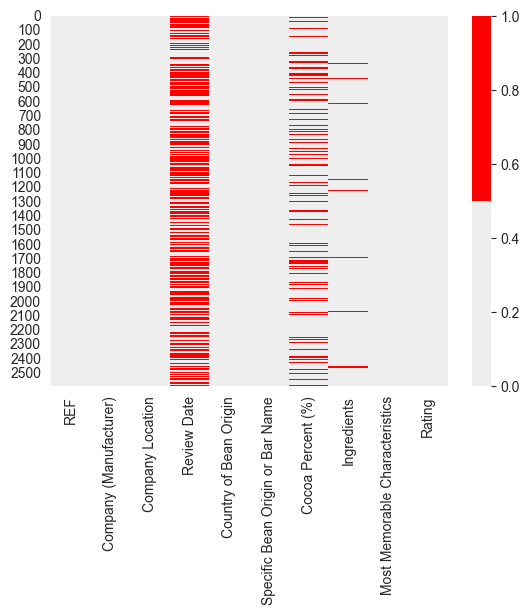

In [3]:
cols = chocolate_bars_data.columns[:]
colours = ['#eeeeee', '#ff0000']
sns.heatmap(chocolate_bars_data[cols].isnull(), cmap=sns.color_palette(colours))

In [4]:
chocolate_bars_data.isnull().any()

REF                                 False
Company (Manufacturer)              False
Company Location                    False
Review Date                          True
Country of Bean Origin              False
Specific Bean Origin or Bar Name    False
Cocoa Percent (%)                    True
Ingredients                          True
Most Memorable Characteristics      False
Rating                              False
dtype: bool

In [5]:
for col in chocolate_bars_data.columns:
    pct_missing = chocolate_bars_data[col].isnull().sum()
    print(f'{col} - {round(pct_missing)}')

REF - 0
Company (Manufacturer) - 0
Company Location - 0
Review Date - 1428
Country of Bean Origin - 0
Specific Bean Origin or Bar Name - 0
Cocoa Percent (%) - 528
Ingredients - 87
Most Memorable Characteristics - 0
Rating - 0


In [6]:
for col in chocolate_bars_data.columns:
    pct_missing = np.mean(chocolate_bars_data[col].isnull())
    print(f'{col} - {round(pct_missing * 100)}%')

REF - 0%
Company (Manufacturer) - 0%
Company Location - 0%
Review Date - 55%
Country of Bean Origin - 0%
Specific Bean Origin or Bar Name - 0%
Cocoa Percent (%) - 20%
Ingredients - 3%
Most Memorable Characteristics - 0%
Rating - 0%


 Исключите строки и столбцы с наибольшим количеством пропусков

In [7]:
chocolate_bars_data_after = chocolate_bars_data.drop(["Review Date"], axis=1)
chocolate_bars_data_after.head()

,REF,Company (Manufacturer),Company Location,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent (%),Ingredients,Most Memorable Characteristics,Rating
0,2454,5150,U.S.A.,Tanzania,"Kokoa Kamili, batch 1",76.0,"3- B,S,C","rich cocoa, fatty, bready",3.25
1,2454,5150,U.S.A.,Madagascar,"Bejofo Estate, batch 1",76.0,"3- B,S,C","cocoa, blackberry, full body",3.75
2,2458,5150,U.S.A.,Dominican Republic,"Zorzal, batch 1",76.0,"3- B,S,C","cocoa, vegetal, savory",3.50
3,2542,5150,U.S.A.,Fiji,"Matasawalevu, batch 1",68.0,"3- B,S,C","chewy, off, rubbery",3.00
4,2542,5150,U.S.A.,India,"Anamalai, batch 1",68.0,"3- B,S,C","milk brownie, macadamia,chewy",3.50


Произведите замену оставшихся пропусков на логически обоснованные
значения

In [8]:
chocolate_bars_data_after["Cocoa Percent (%)"] = chocolate_bars_data_after["Cocoa Percent (%)"].fillna(chocolate_bars_data_after["Cocoa Percent (%)"].mean())
chocolate_bars_data_after["Cocoa Percent (%)"]

0       76.000000
1       76.000000
2       76.000000
3       68.000000
4       68.000000
          ...    
2583    80.000000
2584    75.000000
2585    75.000000
2586    71.655583
2587    71.655583
Name: Cocoa Percent (%), Length: 2588, dtype: float64

Постройте гистограмму распределения исходного датасета до и после обработки пропусков. Сделайте выводы как обработка данных повлияла на их распределение.

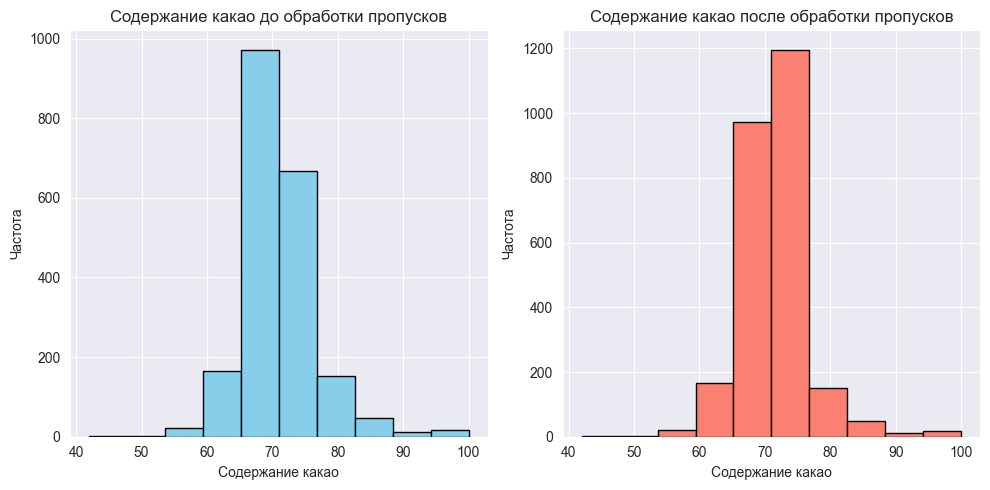

In [9]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(chocolate_bars_data['Cocoa Percent (%)'], bins=10, color='skyblue', edgecolor='black')
plt.title('Содержание какао до обработки пропусков')
plt.xlabel('Содержание какао')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
plt.hist(chocolate_bars_data_after['Cocoa Percent (%)'], bins=10, color='salmon', edgecolor='black')
plt.title('Содержание какао после обработки пропусков')
plt.xlabel('Содержание какао')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()

Проверьте датасет на наличие выбросов, удалите найденные аномальные
записи.

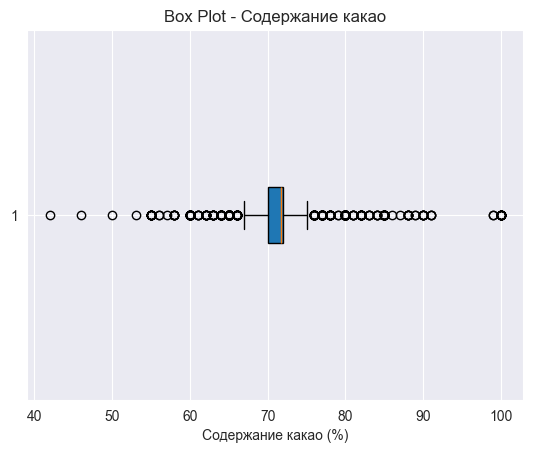

In [10]:
plt.boxplot(chocolate_bars_data_after['Cocoa Percent (%)'], patch_artist=True, vert=False)
plt.xlabel('Содержание какао (%)')
plt.title('Box Plot - Содержание какао')
plt.show()

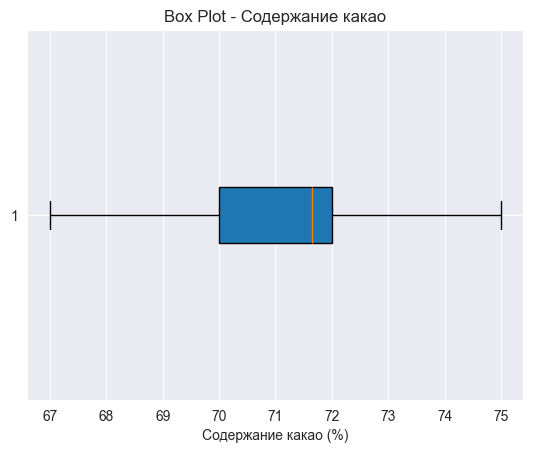

In [11]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

chocolate_bars_data_after = remove_outliers(chocolate_bars_data_after, 'Cocoa Percent (%)')
plt.boxplot(chocolate_bars_data_after['Cocoa Percent (%)'], patch_artist=True, vert=False)
plt.xlabel('Содержание какао (%)')
plt.title('Box Plot - Содержание какао')
plt.show()

Приведите все параметры к числовому виду (кодирование текстовых
данных).

In [12]:
label_encoder = LabelEncoder()

chocolate_bars_data_after.loc[:, 'Company (Manufacturer)'] = label_encoder.fit_transform(chocolate_bars_data_after['Company (Manufacturer)'])
chocolate_bars_data_after.loc[:, 'Company Location'] = label_encoder.fit_transform(chocolate_bars_data_after['Company Location'])
chocolate_bars_data_after.loc[:, 'Country of Bean Origin'] = label_encoder.fit_transform(chocolate_bars_data_after['Country of Bean Origin']).astype('int32')
chocolate_bars_data_after.loc[:, 'Specific Bean Origin or Bar Name'] = label_encoder.fit_transform(chocolate_bars_data_after['Specific Bean Origin or Bar Name']).astype('int32')
chocolate_bars_data_after.loc[:, 'Ingredients'] = label_encoder.fit_transform(chocolate_bars_data_after['Ingredients'])
chocolate_bars_data_after.loc[:, 'Most Memorable Characteristics'] = label_encoder.fit_transform(chocolate_bars_data_after['Most Memorable Characteristics']).astype('int32')

print(chocolate_bars_data_after.head())

    REF Company (Manufacturer) Company Location Country of Bean Origin  \
3  2542                      0               57                     16   
4  2542                      0               57                     23   
5  2546                      0               57                     57   
7   797                      1               17                      3   
9  1011                      1               17                     33   

  Specific Bean Origin or Bar Name  Cocoa Percent (%) Ingredients  \
3                              822          68.000000           5   
4                               68          68.000000           5   
5                             1243          72.000000           5   
7                              178          71.655583          12   
9                              982          70.000000          12   

  Most Memorable Characteristics  Rating  
3                            189    3.00  
4                           1117    3.50  
5          

Cохраните обработанный датасет

In [13]:
import csv

chocolate_bars_data_after.to_csv('Chocolate bars rating after.csv', index=False, quoting=csv.QUOTE_NONNUMERIC)